**Comparação de algoritmos de ML para regressão**

In [3]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
import numpy as np

In [5]:
df = pd.read_csv('x_y_ml_rg_data.csv')
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_active,bioactivity_inactive,bioactivity_intermediate,pic50
0,CHEMBL39380,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1,CHEMBL39003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,CHEMBL39102,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00
3,CHEMBL16120,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.32
4,CHEMBL267332,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,CHEMBL5220792,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.35
22048,CHEMBL5219051,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.34
22049,CHEMBL5219808,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.04
22050,CHEMBL4520920,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.63


In [6]:
selection = ['Name','bioactivity_active','bioactivity_intermediate','bioactivity_inactive','pic50']
X = df.drop(selection,axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22048,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22049,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22050,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


A fim de diminuir o tempo computacional, removeu-se as colunas que possuiam menor variação, utilizando "VarianceThreshold" da biblioteca sklearn

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(22052, 184)

In [8]:
y = df['pic50']
y

0        1.00
1        1.00
2       -0.00
3       -0.32
4        0.27
         ... 
22047   -1.35
22048   -1.34
22049   -1.04
22050   -0.63
22051   -0.59
Name: pic50, Length: 22052, dtype: float64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [10]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [11:53<00:06,  6.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 15436, number of used features: 184
[LightGBM] [Info] Start training from score -1.236818


100%|██████████| 42/42 [11:54<00:00, 17.00s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [07:16<00:05,  5.50s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 15436, number of used features: 184
[LightGBM] [Info] Start training from score -1.236818


100%|██████████| 42/42 [07:17<00:00, 10.42s/it]


In [11]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.90,0.90,0.39,0.89
ExtraTreeRegressor,0.90,0.90,0.39,0.62
ExtraTreesRegressor,0.90,0.90,0.39,44.88
GaussianProcessRegressor,0.90,0.90,0.39,316.62
RandomForestRegressor,0.87,0.87,0.45,34.59
BaggingRegressor,0.85,0.85,0.48,3.74
MLPRegressor,0.82,0.82,0.52,44.48
XGBRegressor,0.78,0.78,0.58,0.58
KNeighborsRegressor,0.67,0.67,0.70,3.17


In [12]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.61,0.62,0.78,34.82
XGBRegressor,0.58,0.60,0.81,0.55
BaggingRegressor,0.57,0.58,0.82,3.75
KNeighborsRegressor,0.52,0.53,0.87,0.80
MLPRegressor,0.49,0.50,0.90,39.17
ExtraTreesRegressor,0.45,0.46,0.93,43.76
LGBMRegressor,0.44,0.46,0.94,0.59
HistGradientBoostingRegressor,0.44,0.46,0.94,5.22
NuSVR,0.38,0.40,0.99,37.61


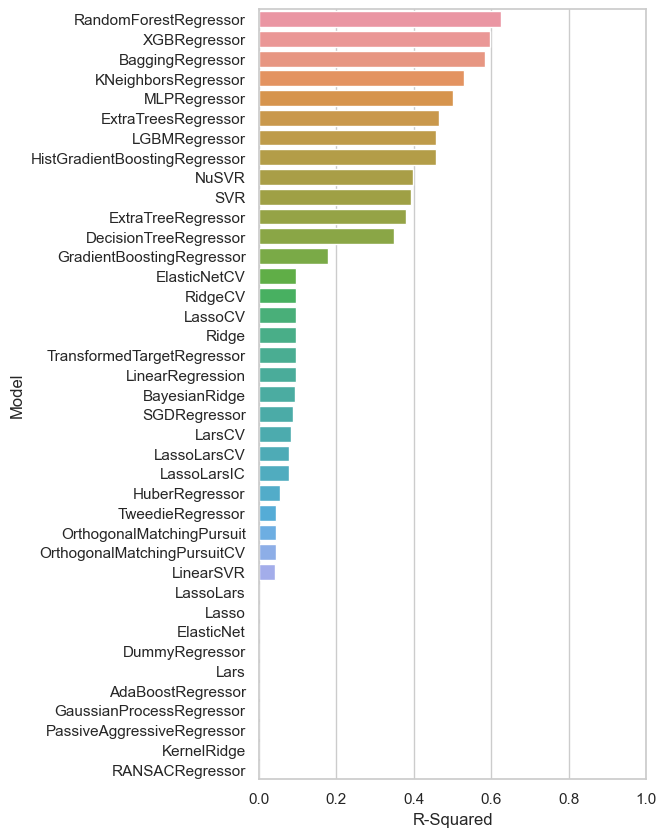

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

plt.savefig('plot_ml_r2_comparacao.pdf')

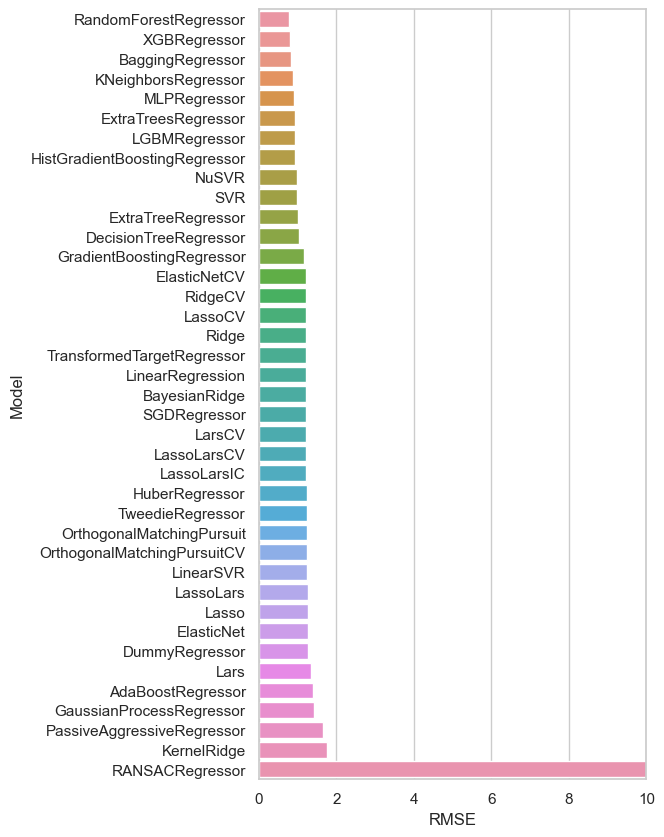

In [14]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

plt.savefig('plot_ml_rmse_comparacao.png')

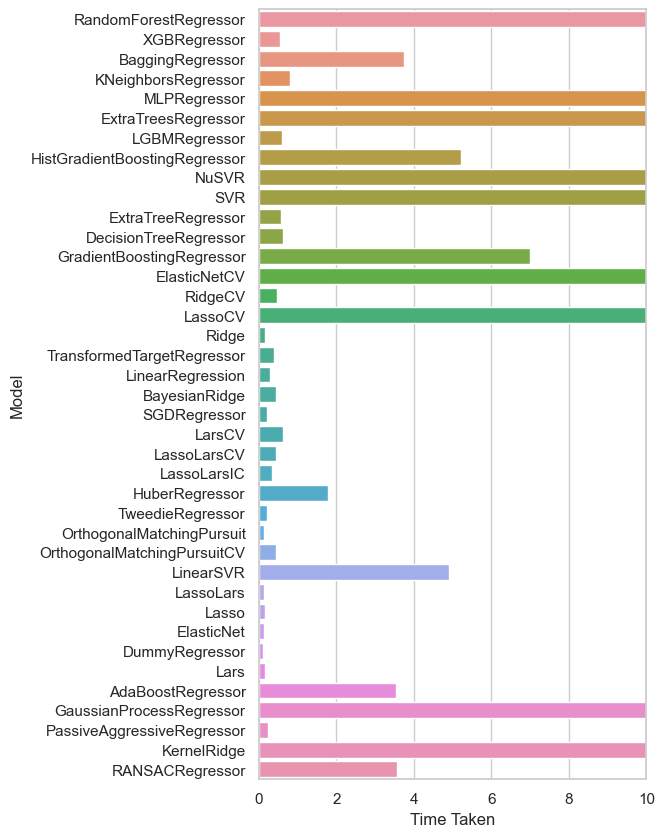

In [15]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))

plt.savefig('plot_ml_time_comparacao.png')

Apesar de possuir um dos maiores tempos computacionais, escolhou-se o algoritmo RandomForestRegressor pois possuiu o melhor ajuste nos dados de teste e menor erro.